# Statistical Deep Learning Midterm

## Group X

### Loading data

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import torch


In [13]:
data = pd.read_csv('card_clear_beforeEncoded.csv')
data = data.drop(columns="Unnamed: 0", axis=1)

In [14]:
data

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,26.822620,22.083333,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,February,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,31.944960,22.166667,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629163,Good
2,CUS_0xd40,March,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,28.609352,22.250000,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,CUS_0xd40,April,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,31.377862,22.333333,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,24.797347,22.416667,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,...,Good,502.38,34.663572,31.500000,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,CUS_0x942c,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,...,Good,502.38,40.565631,31.583333,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,CUS_0x942c,June,25,Mechanic,39628.99,3359.415833,4,6,7,2,...,Good,502.38,41.255522,31.666667,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,CUS_0x942c,July,25,Mechanic,39628.99,3359.415833,4,6,7,2,...,Good,502.38,33.638208,31.750000,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [18]:
# data = pd.read_csv('card_clear_beforeEncoded.csv')

target_column = 'Credit_Score'
X = data.drop(columns=[target_column])
y = data[target_column]

categorical_cols = X.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    X[col] = label_encoders[col].fit_transform(X[col])

y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ValueError: Columns must be same length as key

In [7]:
tabnet = TabNetClassifier()

tabnet.fit(
    X_train=X_train.values,
    y_train=y_train,
    eval_set=[(X_test.values, y_test)], 
    eval_name=["val"],                  
    eval_metric=["logloss"],            
    max_epochs=100,                     
    patience=10,
    batch_size=256,
    virtual_batch_size=128
)

train_loss = tabnet.history['loss']
val_loss = tabnet.history['val_logloss']


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.75957 | val_logloss: 0.7169  |  0:00:12s
epoch 1  | loss: 0.70192 | val_logloss: 0.69456 |  0:00:24s
epoch 2  | loss: 0.69486 | val_logloss: 0.69695 |  0:00:35s
epoch 3  | loss: 0.69205 | val_logloss: 0.69442 |  0:00:45s
epoch 4  | loss: 0.69196 | val_logloss: 0.69169 |  0:00:57s
epoch 5  | loss: 0.68895 | val_logloss: 0.6899  |  0:01:07s
epoch 6  | loss: 0.68229 | val_logloss: 0.68489 |  0:01:18s
epoch 7  | loss: 0.6802  | val_logloss: 0.67978 |  0:01:28s
epoch 8  | loss: 0.67802 | val_logloss: 0.67609 |  0:01:38s
epoch 9  | loss: 0.67278 | val_logloss: 0.6799  |  0:01:48s
epoch 10 | loss: 0.67359 | val_logloss: 0.68124 |  0:01:58s
epoch 11 | loss: 0.67324 | val_logloss: 0.67548 |  0:02:10s
epoch 12 | loss: 0.67162 | val_logloss: 0.67455 |  0:02:23s
epoch 13 | loss: 0.66959 | val_logloss: 0.68102 |  0:02:37s
epoch 14 | loss: 0.67298 | val_logloss: 0.67332 |  0:02:49s
epoch 15 | loss: 0.6694  | val_logloss: 0.67078 |  0:03:00s
epoch 16 | loss: 0.66639 | val_logloss: 

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Accuracy(Before feature selection): 71.10499999999999 %


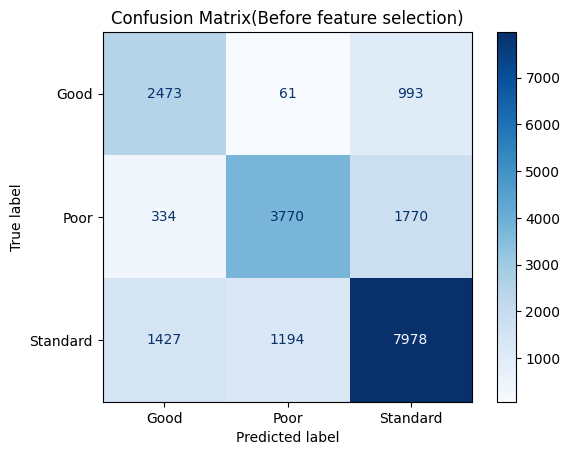

In [8]:
y_pred = tabnet.predict(X_test.values)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy(Before feature selection): {accuracy * 100} %")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix(Before feature selection)")
plt.show()

In [9]:
feature_importances = tabnet.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

print(feature_importance_df)


                     Feature  Importance
8              Interest_Rate    0.284992
13      Num_Credit_Inquiries    0.257347
19       Total_EMI_per_month    0.109376
12      Changed_Credit_Limit    0.088531
14                Credit_Mix    0.072899
20   Amount_invested_monthly    0.066508
7            Num_Credit_Card    0.055440
18     Payment_of_Min_Amount    0.054975
4              Annual_Income    0.009933
0                Customer_ID    0.000000
21         Payment_Behaviour    0.000000
17        Credit_History_Age    0.000000
16  Credit_Utilization_Ratio    0.000000
15          Outstanding_Debt    0.000000
11    Num_of_Delayed_Payment    0.000000
1                      Month    0.000000
10       Delay_from_due_date    0.000000
9                Num_of_Loan    0.000000
6          Num_Bank_Accounts    0.000000
5      Monthly_Inhand_Salary    0.000000
3                 Occupation    0.000000
2                        Age    0.000000
22           Monthly_Balance    0.000000


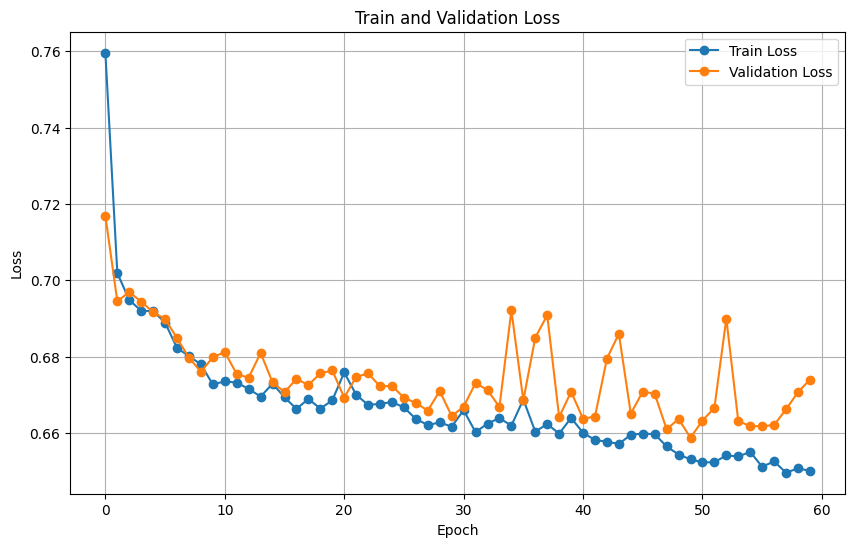

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train Loss', marker='o')
plt.plot(val_loss, label='Validation Loss', marker='o')
plt.title('Train and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()
